# 1. Logistic regression

## Exercise 1: Import needed modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Importing linear regression function
import sklearn.linear_model as lm

# Functions to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

**Question:**
1. What purpose was each of these modules imported for?

**Answer:**

*   `warnings`: This is imported to manage warning messages. The line `warnings.filterwarnings('ignore')` specifically tells Python to ignore any warnings that might pop up during the execution of the code.
*   `pandas`: Imported as `pd`. This is a super important library for data manipulation and analysis. We use it to work with DataFrames, which are like tables.
*   `numpy`: Imported as `np`. This is for numerical operations, especially with arrays. It's often used alongside pandas for calculations.
*   `matplotlib.pyplot`: Imported as `plt`. This is for creating visualizations, like plots and graphs. We'll use it to see how our data and models look.
*   `scipy.stats`: This part of SciPy is for statistical functions. It seems like it might be useful for statistical tests or distributions, although it's not explicitly used in the visible code.
*   `statsmodels.api`: Imported as `sm`. This is another library for statistical modeling, which could be used for more in-depth statistical analysis or different types of regression.
*   `sklearn.linear_model`: Imported as `lm`. This is part of scikit-learn and is specifically for linear models, like the linear regression we're about to do.
*   `sklearn.metrics`: This part of scikit-learn is for evaluating the performance of our models using different metrics like R-squared, MAE, and RMSE.

## Exercise 2: Input data
Let's consider a use case where we have to predict students' test outcome i.e., **pass** (**1**) or **fail** (**0**) based on hours studied. In this case the outcome to be predicted is **discrete**.

In [2]:
# Load data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab06/Grade_Set_1_Classification.csv')

print (df)

Mounted at /content/drive
   Hours_Studied  Result
0              2       0
1              3       0
2              4       0
3              5       1
4              6       1
5              7       1
6              8       1
7              9       1
8             10       1


**Question:**
1. On what scales the individual variables are measured?

**Answer:**

Looking at the `df` DataFrame we loaded, we have two variables:

*   `Hours_Studied`: This seems to be a continuous variable, measured in hours. It represents the amount of time a student spent studying.
*   `Result`: This is a discrete variable, specifically a binary variable. It's measured on a nominal scale with two categories: 0 for 'fail' and 1 for 'pass'.

## Exercise 3: Fit linear regression
To classify the observation into **pass** or **fail** (**1** or **0**), let's build a linear regression and try to use a threshold i.e. anything over some value is **pass**, else **fail**.

R-squared: 0.675
Mean Absolute Error: 0.2296296296296296
Root Mean Squared Error: 0.26874192494328497


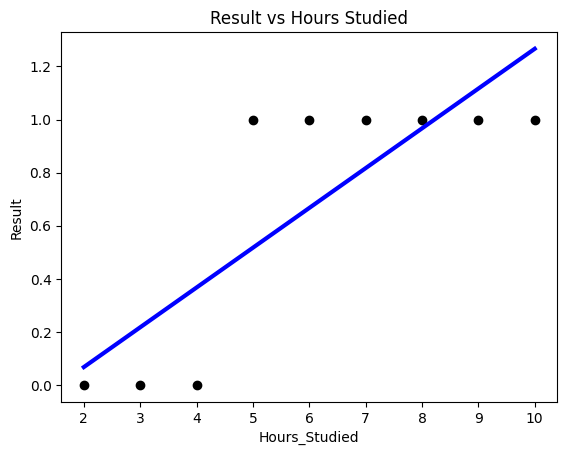

In [3]:
x = np.array(df.Hours_Studied)[:, np.newaxis] # Independent variable
y = df.Result                                 # Dependent variable

# Create linear regression object
lr = lm.LinearRegression()

# Train the model using the training sets
lr.fit(x, y)

# Plotting fitted line
plt.scatter(x, y, color = 'black')
plt.plot(x, lr.predict(x), color = 'blue', linewidth = 3)
plt.title('Result vs Hours Studied')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')

# Add predict value to the data frame
df['Result_Pred'] = lr.predict(x)

# Using built-in function
print ('R-squared:', r2_score(df.Result, df.Result_Pred))
print ('Mean Absolute Error:', mean_absolute_error(df.Result, df.Result_Pred))
print ('Root Mean Squared Error:', np.sqrt(mean_squared_error(df.Result, df.Result_Pred)))

**Questions:**
1. What result do we expect and what result have we obtained?
2. Is linear regression capable of setting boundaries to the classification of observations? Justify your answer.
3. Can you propose another, better solution to this problem?

**Answers:**

1.  We're trying to predict a binary outcome (pass/fail, 0 or 1). With linear regression, we expect the output to be continuous values. The plot shows that the predicted values are indeed continuous and range from around 0.06 to 1.26. We ideally want values close to 0 for fails and close to 1 for passes. While the model seems to capture the general trend (higher hours studied usually means a higher predicted value), it doesn't strictly give us 0s and 1s.

2.  Not directly, no. Linear regression is designed for predicting continuous values. You *could* try to set a threshold on the continuous output (like saying anything above 0.5 is a 'pass'), but it's not the ideal approach for classification problems. The linear model doesn't naturally constrain the output between 0 and 1, which is what we need for probabilities or class membership.

3.  Since this is a classification problem with a binary outcome, a much better approach would be to use **logistic regression**. Logistic regression is specifically designed for binary classification and outputs probabilities that are constrained between 0 and 1 using a sigmoid function. This aligns perfectly with the problem of predicting pass or fail.

## Exercise 4: Sigmoid function
Draw a plot of the sigmoid function.

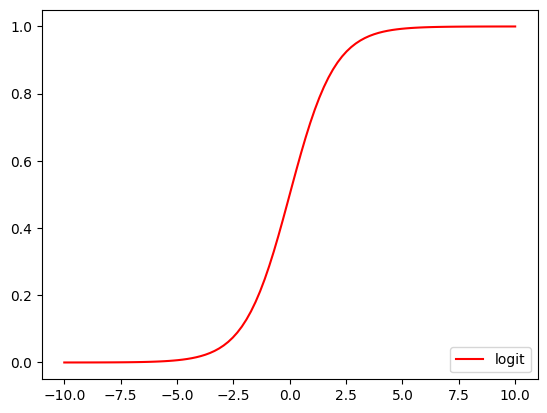

In [4]:
# Plot sigmoid function
x = np.linspace(-10, 10, 100)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y, 'r-', label ='logit')
plt.legend(loc ='lower right')
plt.show()

**Question:**
1. In your opinion, can the sigmoid function be better to classify the observations under investigation than the linear function? Justify your answer.

**Answer:**

Yes, the sigmoid function is better for classification than a linear function because it outputs values between 0 and 1, which are ideal for representing probabilities of class membership. A linear function's output can be any real number, which doesn't naturally fit the probability requirement for classification. The sigmoid function provides a clear boundary between classes, typically around 0.5, making it suitable for binary classification tasks.

## Exercise 5: Fit logistic regression
The logistic regression model will use a sigmoid function.

Predicted probability: [0.05368062 0.15313611 0.36565616 0.64757973 0.85417548 0.94916743
 0.98347736 0.99475738 0.99834945]
Predicted Class: [0 0 0 1 1 1 1 1 1]


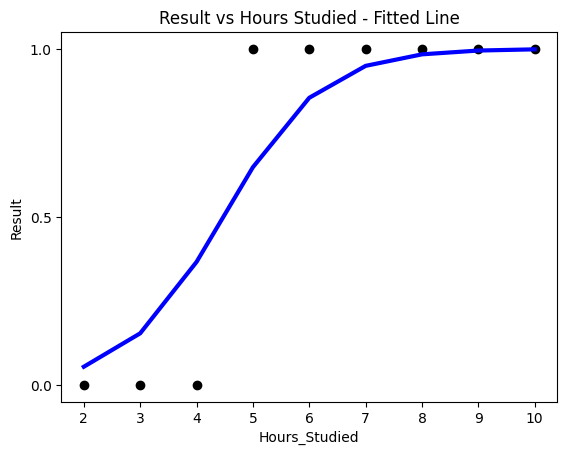

In [5]:
from sklearn.linear_model import LogisticRegression

# Manually add intercept
df['intercept'] = 1
independent_variables = ['Hours_Studied', 'intercept']

x = df[independent_variables]   # Independent variable
y = df['Result']                # Dependent variable

# Instantiate a logistic regression model, and fit with x and y
model = LogisticRegression()
model = model.fit(x, y)

# Check the accuracy on the training set
model.score(x, y)

# The predict_proba() function returns array containing probability of y=0 and y=1
print ('Predicted probability:', model.predict_proba(x)[:,1])

# The predict() function gives convert the probability (y=1) values > 0.5 to 1 else 0
print ('Predicted Class:', model.predict(x))

# Plotting fitted line
plt.scatter(df.Hours_Studied, y,  color = 'black')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Hours_Studied, model.predict_proba(x)[:,1], color = 'blue', linewidth = 3)
plt.title('Result vs Hours Studied - Fitted Line')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')
plt.show()

**Question:**
1. What is the idea of classification using a logistical regression model? Explain this in few sentences.

**Answer:**


The main idea behind using logistic regression for classification is to model the probability of an observation belonging to a particular class. It does this by taking a linear combination of the input features and then passing this result through a sigmoid function. This sigmoid function squashes the output into a value between 0 and 1, which can be interpreted as the probability of the positive class. If this probability is above a certain threshold (usually 0.5), the observation is classified into the positive class; otherwise, it's classified into the negative class. So, instead of predicting a continuous value, logistic regression predicts the *likelihood* of a class and uses that to make a classification decision.

## Exercise 6: Model evaluation

In [6]:
from sklearn import metrics

# Generate evaluation metrics
print ('Accuracy:', metrics.accuracy_score(y, model.predict(x)))
print ('AUC:', metrics.roc_auc_score(y, model.predict_proba(x)[:,1]))

print ('Confusion matrix:\n', metrics.confusion_matrix(y, model.predict(x)))
print ('classification report:\n', metrics.classification_report(y, model.predict(x)))

Accuracy: 1.0
AUC: 1.0
Confusion matrix:
 [[3 0]
 [0 6]]
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



**Question:**
1. How do you understand the individual performance metrics of the model?

**Answer:**


*   **Accuracy:** This is the overall proportion of correct predictions made by the model. In this case, the accuracy is 1.0 (or 100%), which means the model correctly predicted the outcome for all the data points in the training set.
*   **AUC (Area Under the ROC Curve):** The AUC is a measure of the model's ability to distinguish between the positive and negative classes. An AUC of 1.0 means the model can perfectly distinguish between the two classes.
*   **Confusion Matrix:** This is a table that summarizes the performance of the classification model. It shows the counts of true positives (correctly predicted as positive), true negatives (correctly predicted as negative), false positives (incorrectly predicted as positive), and false negatives (incorrectly predicted as negative). In this confusion matrix:
    *   `[[3 0]` indicates 3 true negatives and 0 false positives for class 0 (fail).
    *   `[0 6]]` indicates 0 false negatives and 6 true positives for class 1 (pass).
    This confirms the 100% accuracy as there are no false positives or false negatives.
*   **Classification Report:** This report provides more detailed metrics for each class (0 and 1), including:
    *   **Precision:** The proportion of correctly predicted positive observations out of all observations predicted as positive. For both classes, it's 1.00, meaning when the model predicts a class, it's always correct.
    *   **Recall (Sensitivity):** The proportion of correctly predicted positive observations out of all actual positive observations. For both classes, it's 1.00, meaning the model found all the actual positive and negative cases.
    *   **F1-score:** The harmonic mean of precision and recall. It's a good measure when you need to balance both precision and recall. Again, it's 1.00 for both classes, indicating perfect balance.
    *   **Support:** The number of actual occurrences of each class in the dataset. There are 3 instances of class 0 and 6 instances of class 1.

Overall, these metrics indicate that the logistic regression model achieved perfect performance on this small training dataset.

## Exercise 7: ROC curve

ROC AUC: 1.00


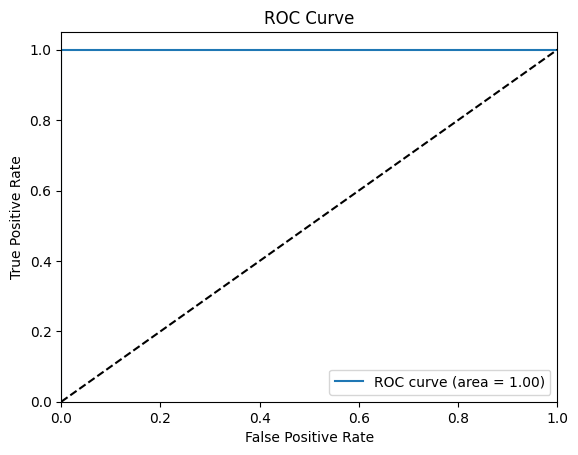

In [7]:
# Determine the false positive and true positive rates
fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(x)[:,1])

# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

**Question:**
1. How can the model quality be evaluated on the basis of the ROC curve?

**Answer:**


We can evaluate the quality of a classification model using the ROC curve by looking at how close the curve is to the top-left corner of the plot. The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

A perfect model would have a ROC curve that goes straight up from (0,0) to (0,1) and then straight across to (1,1). This means it has a TPR of 1 (all positive cases correctly identified) and an FPR of 0 (no negative cases incorrectly identified as positive) for some threshold.

The further the ROC curve is from the diagonal line (representing a random classifier), the better the model's performance. The Area Under the Curve (AUC) is a single value that summarizes the ROC curve; an AUC closer to 1 indicates a better model, while an AUC of 0.5 suggests the model is no better than random guessing. In our case, the AUC of 1.00 indicates a perfect model on this dataset.

## Exercise 8: Logistic regression diagnostics
Inverse of regularization *C* (default value is 1) is one of the key aspect of fitting logistic regression line.

C = 1 (default), Accuracy: 1.0
C = 10, Accuracy: 1.0
C = 100, Accuracy: 1.0
C = 1000, Accuracy: 1.0


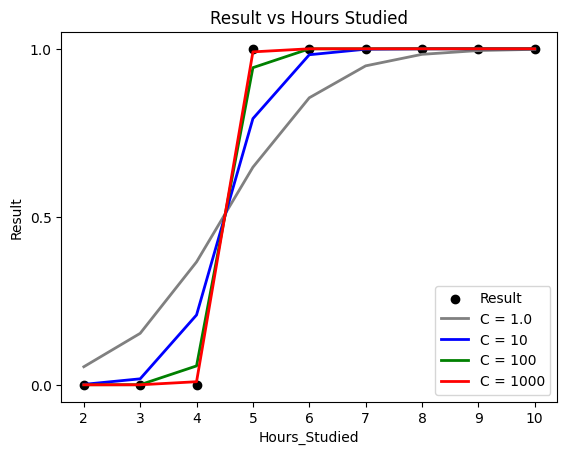

In [8]:
# Instantiate a logistic regression model with default C value, and fit with x and y
model = LogisticRegression()
model = model.fit(x, y)

# Check the accuracy on the training set
print ('C = 1 (default), Accuracy:', metrics.accuracy_score(y, model.predict(x)))

# Instantiate a logistic regression model with C=10, and fit with x and y
model1 = LogisticRegression(C = 10)
model1 = model1.fit(x, y)

# Check the accuracy on the training set
print ('C = 10, Accuracy:', metrics.accuracy_score(y, model1.predict(x)))

# Instantiate a logistic regression model with C=100, and fit with x and y
model2 = LogisticRegression(C = 100)
model2 = model2.fit(x, y)

# Check the accuracy on the training set
print ('C = 100, Accuracy:', metrics.accuracy_score(y, model2.predict(x)))

# Instantiate a logistic regression model with C=1000, and fit with x and y
model3 = LogisticRegression(C = 1000)
model3 = model3.fit(x, y)

# Check the accuracy on the training set
print ('C = 1000, Accuracy:', metrics.accuracy_score(y, model3.predict(x)))


# Plotting fitted line
plt.scatter(df.Hours_Studied, y,  color = 'black', label = 'Result')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Hours_Studied, model.predict_proba(x)[:,1], color = 'gray', linewidth = 2, label = 'C = 1.0')
plt.plot(df.Hours_Studied, model1.predict_proba(x)[:,1], color = 'blue', linewidth = 2,label='C = 10')
plt.plot(df.Hours_Studied, model2.predict_proba(x)[:,1], color = 'green', linewidth = 2,label = 'C = 100')
plt.plot(df.Hours_Studied, model3.predict_proba(x)[:,1], color = 'red', linewidth = 2,label = 'C = 1000')
plt.legend(loc = 'lower right') # Legend location
plt.title('Result vs Hours Studied')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')
plt.show()

**Question:**
1. How does the *C* value affect the complexity of the model?

**Answer:**


In logistic regression (and other models with regularization), the `C` value is the inverse of the regularization strength. This means:

*   **A small `C` value** (like 0.002 in the later example) indicates strong regularization. Strong regularization penalizes large coefficients, which makes the model simpler and less prone to overfitting. It favors a smoother decision boundary.
*   **A large `C` value** (like 10000 in the later example) indicates weak regularization. Weak regularization allows the model to have larger coefficients, making it more complex and potentially better at fitting the training data exactly, but also more likely to overfit to noise in the training data. It can result in a more complex, wobbly decision boundary.

So, in short, a smaller `C` leads to a simpler model, while a larger `C` leads to a more complex model. You need to find a balance to avoid both underfitting (too simple) and overfitting (too complex).

# 2. Multivariable and multi-class logistic regression
Let’s learn multiclass prediction with **Iris** dataset which contains 3 classes of 50 instances each, where each class refers to a type of Iris plant.

## Exercise 9: Import needed modules

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

from sklearn import datasets
import numpy as np
import pandas as pd

iris = datasets.load_iris()

X = iris.data
Y = iris.target

print('Class labels:', np.unique(Y))

Class labels: [0 1 2]


**Question:**
1. What purpose was each of these modules imported for?

**Answer:**

*   `matplotlib.colors.ListedColormap`: This is for creating custom color maps, which are probably used later for visualizing decision boundaries in plots.
*   `matplotlib.pyplot`: Imported as `plt`. This is the standard plotting library in Python, used here to create and customize plots, like the decision boundary plots we'll see later.
*   `sklearn.datasets`: This is part of scikit-learn and is used here specifically to load the `iris` dataset, which is a classic dataset for classification problems.
*   `numpy`: Imported as `np`. Used for numerical operations, especially with arrays, which are fundamental for handling the dataset's features and labels.
*   `pandas`: Imported as `pd`. Although not directly used in the visible code snippet for importing, it's generally used for data manipulation and analysis with DataFrames, which the Iris dataset could be loaded into.

In [10]:
from sklearn.preprocessing import StandardScaler

# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Question:**
1. What is the meaning of the operations performed? Explain them exactly.

**Answer:**


1.  **Splitting Data into Train and Test Sets:**
    *   `from sklearn.model_selection import train_test_split`: This line imports the `train_test_split` function from scikit-learn's model selection module.
    *   `X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)`: This is the core operation. It splits the dataset (`X` for features, `Y` for labels) into four subsets:
        *   `X_train`: The features for the training set.
        *   `X_test`: The features for the test set.
        *   `Y_train`: The labels for the training set.
        *   `Y_test`: The labels for the test set.
    *   `test_size = 0.3`: This specifies that 30% of the data will be allocated to the test set, and the remaining 70% will be used for training.
    *   `random_state = 0`: This ensures that the splitting is done randomly but in a reproducible way. If you run the code again with the same `random_state`, you'll get the same split.

2.  **Standardizing the Data:**
    *   `from sklearn.preprocessing import StandardScaler`: This line imports the `StandardScaler` class from scikit-learn's preprocessing module. Standardization is a common data preprocessing step.
    *   `sc = StandardScaler()`: This creates an instance of the `StandardScaler`.
    *   `X_train = sc.fit_transform(X_train)`: This is where the standardization happens for the training data. `fit_transform` calculates the mean and standard deviation of each feature in the `X_train` set (`fit`) and then scales the features using these calculated values (`transform`). Standardization centers the data around zero with a unit standard deviation.
    *   `X_test = sc.transform(X_test)`: This standardizes the test data using the *same* mean and standard deviation calculated from the *training* data (`sc.transform`). It's crucial to use the parameters learned from the training data to scale the test data to avoid data leakage from the test set into the training process.

In essence, these operations prepare the data by dividing it into sets for training and evaluating the model and by scaling the features to have similar ranges, which can improve the performance of many machine learning algorithms.

## Exercise 11: Train and evaluate the logistic regression model

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l2', C = 10, random_state = 0)
lr.fit(X_train, Y_train)

from sklearn import metrics

# Generate evaluation metrics
print('Train - Accuracy:', metrics.accuracy_score(Y_train, lr.predict(X_train)))
print('Train - Confusion matrix:\n', metrics.confusion_matrix(Y_train, lr.predict(X_train)))
print('Train - classification report:\n', metrics.classification_report(Y_train, lr.predict(X_train)))

print('Test - Accuracy:', metrics.accuracy_score(Y_test, lr.predict(X_test)))
print('Test - Confusion matrix:\n', metrics.confusion_matrix(Y_test, lr.predict(X_test)))
print('Test - classification report:\n', metrics.classification_report(Y_test, lr.predict(X_test)))

Train - Accuracy: 0.9809523809523809
Train - Confusion matrix:
 [[34  0  0]
 [ 0 31  1]
 [ 0  1 38]]
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      0.97      0.97        32
           2       0.97      0.97      0.97        39

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

Test - Accuracy: 0.9777777777777777
Test - Confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0

**Question:**
1. What conclusions can you draw from the comparison of the model evaluation results for the training and test set?

**Answer:**


Looking at the evaluation metrics for both the training and test sets in Exercise 11, we can draw a few conclusions:

*   **High Performance on Both Sets:** The model achieved very high accuracy on both the training (0.981) and test (0.978) sets. The confusion matrices and classification reports also show high precision, recall, and F1-scores for all classes in both sets. This indicates that the logistic regression model is performing very well on this dataset.
*   **Similar Performance:** The performance metrics on the training set are very close to the performance metrics on the test set. The accuracy is almost identical, and the precision, recall, and F1-scores are also very similar for each class.
*   **No Significant Overfitting:** Since the performance on the test set is nearly as good as the performance on the training set, it suggests that the model is not significantly overfitting to the training data. If there were significant overfitting, we would expect the training accuracy to be much higher than the test accuracy.

In summary, the logistic regression model appears to be a good fit for the Iris dataset, generalizing well to unseen data as indicated by the similar performance on both the training and test sets.

# 3. Logistic regression diagnostics
Overfitting occurs when the model fits the data very well capturing all the noises. Let's understand the issue by looking at some example dataset.

## Exercise 12: Fitting logistic regression for two independent variables which are linearly separable

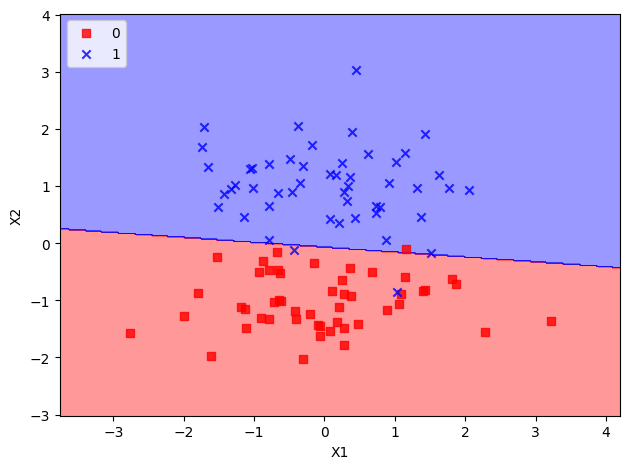

In [12]:
# Let's use sklearn make_classification() function to create some test data.
from sklearn.datasets import make_classification
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=666)

# Build a simple logistic regression model
clf = LogisticRegression().fit(X, Y)

def plot_decision_regions(X, Y, classifier):

    h = 0.02  # Step size in the mesh
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(Y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(Y)):
        plt.scatter(x = X[Y == cl, 0], y = X[Y == cl, 1],
                    alpha = 0.8, color = cmap(idx),
                    marker = markers[idx], label = cl)

# Plot the decision boundary
plot_decision_regions(X, Y, classifier = clf)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

**Question:**
1. In your opinion, does the model of simple logistic regression built up discriminate well against the data set? Justify your answer.

**Answer:**


Yes, in my opinion, the simple logistic regression model built in Exercise 12 discriminates well against this particular dataset.

Looking at the plot generated by the `plot_decision_regions` function, the decision boundary (the area where the background color changes) clearly separates the two classes (represented by the different markers, 's' and 'x'). All the data points of one class fall on one side of the boundary, and all the data points of the other class fall on the other side. This indicates that the model is able to perfectly classify all the training examples in this dataset. The dataset generated by `make_classification` with these parameters is likely linearly separable, which is why a simple linear model like logistic regression with a linear decision boundary works so well.

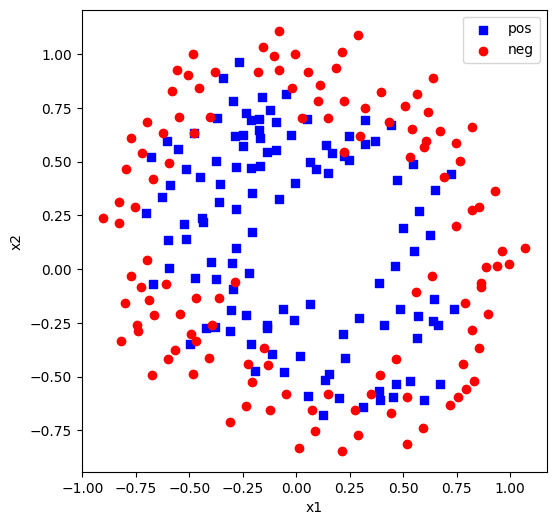

In [13]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab06/LR_NonLinear.csv')

pos = data['class'] == 1
neg = data['class'] == 0
x1 = data['x1']
x2 = data['x2']

def draw_plot():
    plt.figure(figsize = (6, 6))
    plt.scatter(np.extract(pos, x1), np.extract(pos, x2), c = 'b', marker = 's', label = 'pos')
    plt.scatter(np.extract(neg, x1), np.extract(neg, x2), c = 'r', marker = 'o', label = 'neg')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()

draw_plot()

Create higher order polynomials for independent variable.

In [15]:
order_no = 6

# Map the variable 1 & 2 to its higher order polynomial
def map_features(variable_1, variable_2, order = order_no):
    assert order >= 1
    def iter():
        for i in range(1, order + 1):
            for j in range(i + 1):
                yield np.power(variable_1, i - j) * np.power(variable_2, j)
    return np.vstack(list(iter()))

out = map_features(data['x1'], data['x2'], order = order_no)
X = out.transpose()
Y = data['class']

# Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

By default L2 is the regularization for logistic regression.

Train Accuracy for C = 0.002: 0.6181818181818182
Test Accuracy for C = 0.002: 0.6056338028169014

Train Accuracy for C = 1: 0.8363636363636363
Test Accuracy for C = 1: 0.8028169014084507

Train Accuracy for C = 10000: 0.8545454545454545
Test Accuracy for C = 10000: 0.8028169014084507


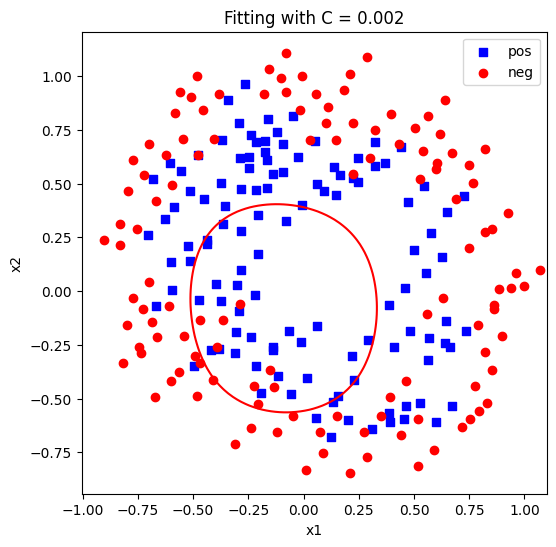

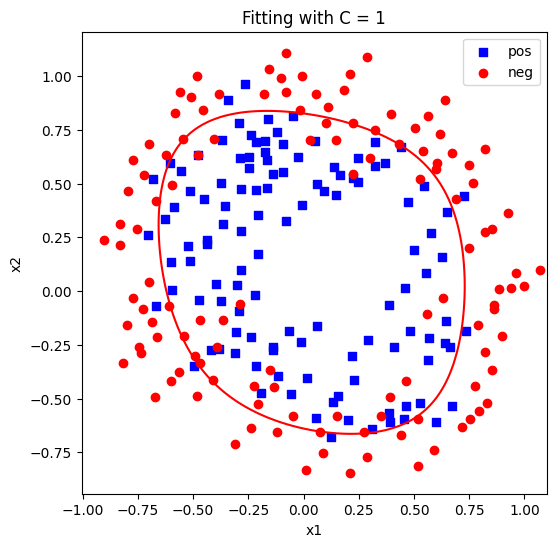

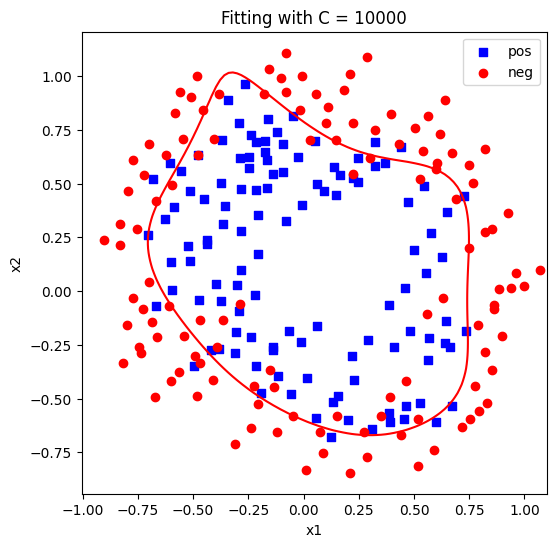

In [16]:
# Function to draw classifier line
def draw_boundary(classifier):
    dim = np.linspace(-0.8, 1.1, 100)
    dx, dy = np.meshgrid(dim, dim)
    v = map_features(dx.flatten(), dy.flatten(), order = order_no)
    z = (np.dot(classifier.coef_, v) + classifier.intercept_).reshape(100, 100)
    plt.contour(dx, dy, z, levels = [0], colors = ['r'])

# Fit with C = 0.002
clf = LogisticRegression(C = 0.002).fit(X_train, Y_train)
print('Train Accuracy for C = 0.002:', clf.score(X_train, Y_train))
print('Test Accuracy for C = 0.002:', clf.score(X_test, Y_test))
draw_plot()
plt.title('Fitting with C = 0.002')
draw_boundary(clf)
plt.legend();

# Fit with C = 1
clf = LogisticRegression(C = 1).fit(X_train, Y_train)
print('\nTrain Accuracy for C = 1:', clf.score(X_train, Y_train))
print('Test Accuracy for C = 1:', clf.score(X_test, Y_test))
draw_plot()
plt.title('Fitting with C = 1')
draw_boundary(clf)
plt.legend();

# Fit with C = 10000
clf = LogisticRegression(C = 10000).fit(X_train, Y_train)
print('\nTrain Accuracy for C = 10000:', clf.score(X_train, Y_train))
print('Test Accuracy for C = 10000:', clf.score(X_test, Y_test))
draw_plot()
plt.title('Fitting with C = 10000')
draw_boundary(clf)
plt.legend();

**Questions:**
1. How will you justify the decision boundary for the individual C values?
2. Which model do you think is the best? Justify your answer.

**Answers:**



1.  *   **C = 0.002 (Strong Regularization):** With a small C, the regularization is strong. This pushes the model to have smaller coefficients, resulting in a simpler model and a smoother decision boundary. Looking at the plot, the boundary for C=0.002 is the most linear and doesn't capture the nuances of the data distribution well. It seems to be underfitting.
    *   **C = 1 (Moderate Regularization):** As we increase C to 1, the regularization is weaker. The model becomes more complex and tries to fit the training data better. The decision boundary for C=1 is more curved than for C=0.002 and seems to do a better job of separating the classes while still being relatively smooth.
    *   **C = 10000 (Weak Regularization):** With a very large C, the regularization is very weak. The model is allowed to be quite complex and can fit the training data almost perfectly, potentially capturing noise. The decision boundary for C=10000 is the most complex and "wobbly," closely following the training data points. This might indicate overfitting.

2.  
    *   C = 0.002: Train Accuracy: 0.618, Test Accuracy: 0.606. Poor performance on both, indicating underfitting.
    *   C = 1: Train Accuracy: 0.836, Test Accuracy: 0.803. Good performance on both, with a small gap between train and test.
    *   C = 10000: Train Accuracy: 0.855, Test Accuracy: 0.803. Slightly higher training accuracy than C=1, but the same test accuracy. The larger gap between train and test accuracy compared to C=1 suggests a bit more overfitting.

Considering the balance between fitting the training data and generalizing to unseen data (test set), the model with **C = 1** seems to be the best. It achieves a good balance, with reasonably high accuracy on both the training and test sets and less indication of overfitting compared to the model with C=10000. While C=10000 fits the training data slightly better, it doesn't improve the performance on the test set and shows signs of being too complex.

# 4. Decision trees
A decision tree is a tree-like structure. Internal node represents test on an attribute, each branch represents outcome of a test and each leaf node represents a class label - decision taken after computing all attributes. A path from root to leaf represents classification rules. Thus, a decision tree consists of 3 types of nodes:
- root node;
- branch node;
- leaf node (class label).

Advantage of decision tree is that there is no need of exclusive creation of dummy variables.

## Exercise 14: Multivariate and multi-class decision tree
We will first load the **Iris** dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where:
- **0** = Iris-Setosa;
- **1** = Iris-Versicolor;
- **2** = Iris-Virginica.

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics

iris = datasets.load_iris()
X = iris.data
Y = iris.target

print('Class labels:', np.unique(Y))

Class labels: [0 1 2]


In the next step, we will split data into train and test set.

In [18]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Now we can build and evaluate a classifier model.

In [19]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, Y_train)

# Generate evaluation metrics
print('Train - Accuracy:', metrics.accuracy_score(Y_train, clf.predict(X_train)))
print('Train - Confusion matrix:\n', metrics.confusion_matrix(Y_train, clf.predict(X_train)))
print('Train - classification report:\n', metrics.classification_report(Y_train, clf.predict(X_train)))

print('\nTest - Accuracy:', metrics.accuracy_score(Y_test, clf.predict(X_test)))
print('Test - Confusion matrix:\n', metrics.confusion_matrix(Y_test, clf.predict(X_test)))
print('Test - classification report:\n', metrics.classification_report(Y_test, clf.predict(X_test)))

Train - Accuracy: 1.0
Train - Confusion matrix:
 [[34  0  0]
 [ 0 32  0]
 [ 0  0 39]]
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        39

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105


Test - Accuracy: 0.9777777777777777
Test - Confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98 

**Question:**
1. What conclusions can you draw from the comparison of model evaluation results for the training and test set?

**Answer:**

The structure and operation of the decision tree can be visualized by means of a graph.

In [20]:
tree.export_graphviz(clf, out_file = '/content/drive/My Drive/Colab Notebooks/Lab06/tree.dot')

from six import StringIO
import pydot
out_data = StringIO()

tree.export_graphviz(clf, out_file = out_data,
                    feature_names = iris.feature_names,
                    class_names = clf.classes_.astype(int).astype(str),
                    filled = True, rounded = True,
                    special_characters = True,
                    node_ids = True)

graph = pydot.graph_from_dot_data(out_data.getvalue())
graph[0].write_pdf('/content/drive/My Drive/Colab Notebooks/Lab06/Iris.pdf')  # Save to pdf

An **Iris.pdf** file will be created in the working directory. Find this file and open it.

**Questions:**
1. How will you describe the operation of a decision tree based on its graph? In the description, provide numerical values of the relevant features.
2. Which feature proved to be irrelevant to the operation of the decision tree?

**Answers:**


1.  Describing the operation of the decision tree based on its graph (the Iris.pdf file): The graph shows a series of decisions made at each node, starting from the root. Each internal node represents a test on a specific feature (like petal width or petal length) and a threshold value. Based on whether the condition is true or false, you follow the corresponding branch. You continue down the tree, making decisions based on feature values, until you reach a leaf node. The leaf node represents the predicted class label (0, 1, or 2) for an instance that follows that path. The `gini` value at each node indicates the impurity, and `samples` is the number of data points at that node. The `value` array shows the class distribution at that node. For example, the root node might split based on `petal width (cm) <= 0.8`. If true, you go down one path, and if false, you go down another. Subsequent nodes will have further splits on other features and their thresholds, like `petal length (cm) <= 4.95`. The numerical values in the graph are the split thresholds and the counts of samples in each class at each node.

2.  Which feature proved irrelevant: By looking at the decision tree graph, you can see which features are actually used to make splits. Features that are never used in any of the internal nodes to split the data are considered irrelevant by this particular tree model. In the Iris dataset decision tree, the features used for splitting are typically 'petal length (cm)' and 'petal width (cm)'. You would need to examine the generated PDF to see if 'sepal length (cm)' or 'sepal width (cm)' appear in any of the decision nodes. If a feature doesn't appear in any node, it was not considered useful by the algorithm for making classifications on this dataset.